Twitter Sentiment Analysis is the process of computationally identifying and categorizing tweets expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#upload the data and store in a variable
data= pd.read_csv('/content/Sentiment.csv')

In [3]:
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
data.shape           #shape of data

(13871, 21)

In [5]:
data.columns            #column

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
data.select_dtypes(include=object).columns #categorical column

Index(['candidate', 'relevant_yn', 'sentiment', 'subject_matter',
       'candidate_gold', 'name', 'relevant_yn_gold', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
data.select_dtypes(exclude=object).columns           #numerical column

Index(['id', 'candidate_confidence', 'relevant_yn_confidence',
       'sentiment_confidence', 'subject_matter_confidence', 'retweet_count',
       'tweet_id'],
      dtype='object')

In [8]:
data.info()          #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [9]:
data.duplicated()           #checking duplicate values

0        False
1        False
2        False
3        False
4        False
         ...  
13866    False
13867    False
13868    False
13869    False
13870    False
Length: 13871, dtype: bool

In [10]:
data.describe()             #statistics information

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [11]:
data.isnull().sum()        #checking null values

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

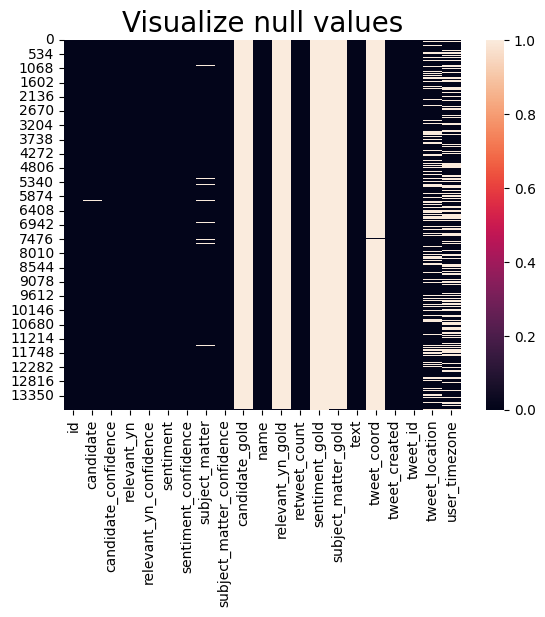

In [12]:
#let's visualize null values
#plt.figure(figsize=(8,6))
sns.heatmap(data=data.isnull())
plt.title("Visualize null values",fontsize=20)
plt.show()

We only want to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral, So I am only keeping necesserly column.

In [13]:
#saving text and sentiment column into another variable
tweets= data[["text", "sentiment"]]
tweets.head(2)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive


In [14]:
tweets.isnull().sum()     #checking null values

text         0
sentiment    0
dtype: int64

In [15]:
#cheking unique values in sentiment
tweets["sentiment"].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [16]:
#check the percentage for class balance
tweets["sentiment"].value_counts(normalize=True)

Negative    0.612285
Neutral     0.226516
Positive    0.161200
Name: sentiment, dtype: float64

In [17]:
#rename sentiment column to target
tweets= tweets.rename(columns={'sentiment':'Target'})

In [18]:
tweets.head(2)

,text,Target
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive


**Train test split**

In [19]:
x=tweets['text']               #dependent column
y= tweets['Target']           #independent column

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size= 0.33, random_state= 42)

In [21]:
len(x_train), len(y_train)

(9293, 9293)

In [22]:
len(x_test), len(y_test)

(4578, 4578)

**EDA**

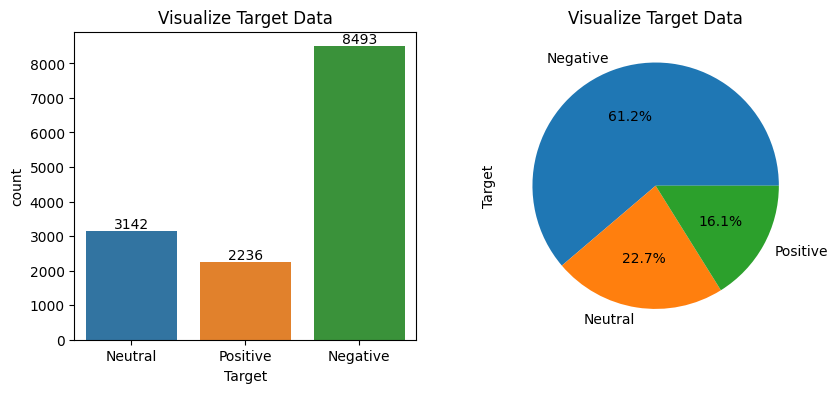

In [23]:
#visualize target column
plt.figure(figsize=(15,4))    #set a figure size

plt.subplot(131)
plt.title("Visualize Target Data")
ax=sns.countplot(x='Target',data=tweets)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(132)
plt.title("Visualize Target Data")
tweets["Target"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

According to graph percentage of negative tweets are more as compared to positive and nuetral.

**Text Preprocessing**

In [24]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.0 MB/s eta 0:00:00


In [25]:
#importing libraries for text preprocessing
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lm= WordNetLemmatizer()
ps=PorterStemmer()
from nltk.corpus.reader.tagged import word_tokenize
nltk.download('wordnet')
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
nltk_stopwords = set(stopwords.words('english'))      #nltk stopwords
print(nltk_stopwords)

{'he', 'or', "weren't", "aren't", 'ours', 'is', 'only', 'shan', 'i', "you're", 'than', 'in', 'aren', 'ma', 'its', 'has', 'but', "doesn't", "mustn't", 'and', 'myself', 'yourselves', 'which', 'where', 'wasn', 'of', "hadn't", 'under', 't', 'ain', 'out', "don't", 'been', 'll', 're', 'before', 'all', 'if', "shouldn't", 'mustn', 'against', 'are', 'into', 'such', 'them', "you'll", 'while', 'yours', 'y', 'o', 'my', 'for', 'itself', 'being', 'who', 's', 'now', 'didn', 'any', 'after', "you'd", 'don', 'not', 'her', 'won', 'you', 'to', 'on', 'this', 'our', "that'll", 'she', 'when', 'as', 'too', 'couldn', "needn't", "should've", "couldn't", 'shouldn', 'whom', 'with', 'him', 'mightn', 'were', "wasn't", 'we', 'himself', 'why', 'will', 'did', "haven't", 'his', 'own', 'about', 'needn', 'other', 'more', 'below', 'there', 'once', "mightn't", 'do', 'hers', 'until', 'off', 'each', 'hasn', 'your', 'am', 'doesn', 'between', 've', 'how', 'd', "it's", 'they', 'these', 'above', 'same', 'that', 'be', 'through', 

In [27]:
len(nltk_stopwords)

179

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'ours', 'is', 'only', 'anyhow', 'i', 'take', 'formerly', 'front', 'has', 'but', 'its', 'and', 'which', 'of', 'under', 'call', 'whoever', 'least', 'out', 'been', 'before', 'all', 'thereby', 'anyway', 'seems', 'against', 'are', 'into', 'such', 'them', 'fifteen', 'while', 'twelve', 'becomes', 'among', 'my', 'next', 'empty', 'thereafter', 'not', 'whether', 'top', 'still', 'however', 'amount', 'except', 'without', 'on', 'our', 'together', 'part', 'else', 'beyond', 'hasnt', 'yet', 'mostly', 'whom', 'with', 'whole', 'within', 'either', 'fill', 'ie', 'onto', 'were', 'four', 'we', 'himself', 'will', 'would', 'his', 'own', 'none', 'somehow', 'amongst', 'always', 'elsewhere', 'name', 'more', 'side', 'anything', 'below', 'off', 'hers', 'con', 'each', 'your', 'full', 'might', 'get', 'per', 'how', 'others', 'five', 'thin', 'they', 'amoungst', 'these', 'above', 'thence', 'therein', 'since', 'thereupon', 'nevertheless', 'through', 'though', 'the', 'whenever', 'became', 'often', 'perhaps', 'almost', '

In [29]:
len(sklearn_stopwords)

318

In [30]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

In [31]:
#concat train and test data
training_data= pd.concat([x_train, y_train], axis=1)
test_data= pd.concat([x_test, y_test], axis=1)

In [32]:
training_data.head(5)

,text,Target
2514,@EPAespanol Who's the real illegal alien #GOPD...,Neutral
4385,RT @exjon: Rubio wins. #GOPDebate,Positive
10151,#GOPdebates Kasich deserves more airtime!,Positive
7988,"RT @larryelder: Trump should have said, ""Megyn...",Positive
11997,RT @RWSurferGirl: FOX News won't admit who the...,Negative


In [33]:
training_data.tail(5)

,text,Target
5191,Love when the #GOPDebate takes over @mamasbarn...,Positive
13418,"RT @monaeltahawy: #WhereRWomen I'm in #Cairo, ...",Negative
5390,It's very interesting that every one of the GO...,Negative
860,Chris Christie tried to wrap himself in 9/11 (...,Negative
7270,RT @DabneyPorte: Ohhhh #BenCarson. Your honest...,Positive


In [34]:
#checking some tweets
training_data['text'][5390]

"It's very interesting that every one of the GOP candidates hates the govt., &amp; yet they're applying for a job to join it. #GOPDebate"

In [35]:
training_data['text'][860]

'Chris Christie tried to wrap himself in 9/11 (Giuliani-style) during the #GOPdebate. In doing so, he lied, twice. http://t.co/y6mUdmr66P'

In [36]:
training_data['text'][13418]

"RT @monaeltahawy: #WhereRWomen I'm in #Cairo, where I often rail vs misogyny in politics. And here are men, men, men #GOPDebates http://t.c…"

In [37]:
#code for text preprocessing
def text_preprocess(text):
  text= re.sub(r"'s\b", " is", text) #Substitute 's with " is"
  text = re.sub('http\S+\s*', ' ', text)  # remove URLs
  text = contractions.fix(text)
  text = re.sub('RT|cc', ' ', text)  # remove RT and cc
  text = re.sub('#', '', text)  # remove hashtags
  text = re.sub('@\S+', '  ', text)  # remove mentions
  text = re.sub(r'[^\x00-\x7f]',r' ', text)
  text = re.sub('\s+', ' ', text)  # remove extra whitespace

  text= text.lower()         #converting the text into lowercase
  text= nltk.word_tokenize(text)            #tokenize the text into words

  y=[]                      #creating a blank list
  for i in text:                  #iteratre each word with the help of for loop
    if i.isalnum():                    #if the number was alphanumeric(either string or number)
      y.append(i)              #appending that on blank list

  text= y[:]                #saving y into text
  y.clear()                #clearing list y

  for i in text:                       #iterate each word into text
    if i not in combined_stopwords and i not in string.punctuation:  #removing stopword and punctuation
      y.append(i)              #appenting it into y

  text= y[:]
  y.clear()

  text = [i for i in text if len(i)>2]             #remove the words whose length 2 or less than 2

  for i in text:
   y.append(lm.lemmatize(i))                     #apply stem function

  return " ".join(y)            #join all the tokenized words



In [38]:
#apply the function and creating a new column
training_data['preprocess_text']= training_data['text'].apply(text_preprocess)

In [39]:
training_data.head()          #checking after preprocessing

,text,Target,preprocess_text
2514,@EPAespanol Who's the real illegal alien #GOPD...,Neutral,real illegal alien gopdebate farrakhan immigra...
4385,RT @exjon: Rubio wins. #GOPDebate,Positive,rubio win gopdebate
10151,#GOPdebates Kasich deserves more airtime!,Positive,gopdebates kasich deserves airtime
7988,"RT @larryelder: Trump should have said, ""Megyn...",Positive,trump said megyn ask candidate plan support wi...
11997,RT @RWSurferGirl: FOX News won't admit who the...,Negative,fox news admit republican leader right mean le...


In [40]:
#checking some tweets
training_data['preprocess_text'][5390]

'interesting gop candidate hate amp applying job join gopdebate'

In [41]:
training_data['preprocess_text'][860]

'chris christie tried wrap gopdebate lied twice'

In [42]:
training_data['preprocess_text'][13418]

'whererwomen cairo rail misogyny politics men men men gopdebates'

In [43]:
#apply it for test data
test_data['preprocess_text']= test_data['text'].apply(text_preprocess)

In [44]:
test_data.head()

,text,Target,preprocess_text
5040,"To me, the real winner of last night #GOPDebat...",Positive,real winner night gopdebate megynkelly
1078,"RT @DanScavino: .@megynkelly,\nSome results on...",Positive,result candidate gopdebate makeamericagreataga...
13717,I'm going to bed...@JohnKasich gets my vote to...,Positive,going bed get vote tonight gopdebate gopdebates
3527,@FoxNews after last night's #GOPDebate @Real...,Positive,night gopdebate emerged
3404,RT @TCPalmKGardner: Who told the truth and who...,Neutral,told truth pant night gopdebate


**Finding most frequent word in data**

In [45]:
training_data.drop(["text"],axis=1,inplace=True)            #droping text column bcz we preprocess the text, so don't need for old text column

In [46]:
training_data.head(2)

,Target,preprocess_text
2514,Neutral,real illegal alien gopdebate farrakhan immigra...
4385,Positive,rubio win gopdebate


In [47]:
test_data.drop(["text"],axis=1,inplace=True) #dropping text column

In [48]:
test_data.head(2)

,Target,preprocess_text
5040,Positive,real winner night gopdebate megynkelly
1078,Positive,result candidate gopdebate makeamericagreataga...


['real', 'illegal', 'alien', 'gopdebate', 'farrakhan', 'immigration', 'amp', 'mexican', 'bor', 'rubio', 'win', 'gopdebate', 'gopdebates', 'kasich', 'deserves', 'airtime', 'trump', 'said', 'megyn', 'ask', 'candidate', 'plan', 'support', 'win', 'nomination', 'gopdebat', 'fox', 'news', 'admit', 'republican', 'leader', 'right', 'mean', 'lead', 'gopd', 'fox', 'news', 'admit', 'republican', 'leader', 'right', 'mean', 'lead', 'gopd', 'night', 'gopdebate', 'saw', 'bunch', 'rich', 'old']


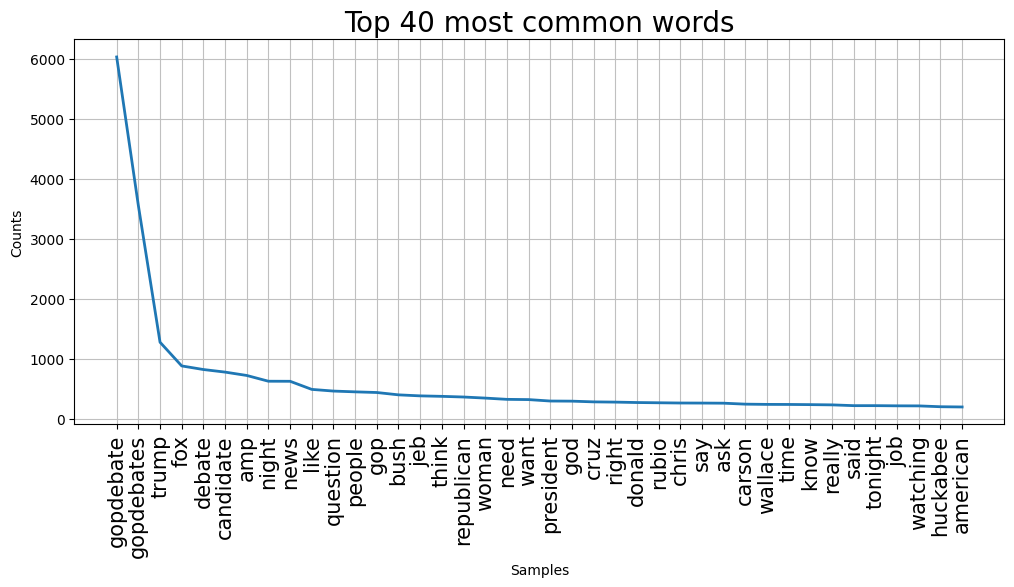

In [49]:
#common words in preprocess text
words = []
for i in training_data['preprocess_text']:
    words.extend(i.split())

print(words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(words)

plt.figure(figsize=(12,5))
plt.title('Top 40 most common words', fontsize=20)
plt.xticks(fontsize=15)

freq_dist.plot(40, cumulative=False)

plt.show()

In [50]:
#importing library
from wordcloud import WordCloud
wc=WordCloud(width=800, height=500, min_font_size=10, background_color= 'white')

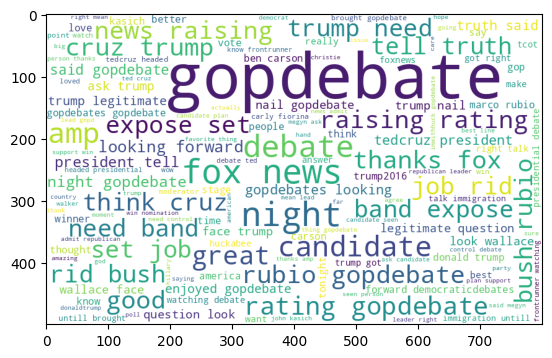

In [51]:
#visualize positive word
positive_wc= wc.generate(training_data[training_data["Target"]=='Positive']['preprocess_text'].str.cat(sep=" "))
plt.imshow(positive_wc)             #for display plot

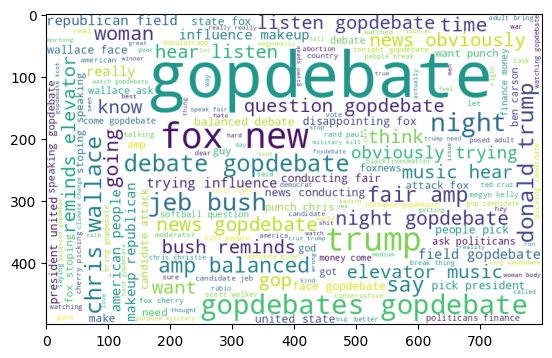

In [52]:
#visualize negative word
negative_wc= wc.generate(training_data[training_data["Target"]=='Negative']['preprocess_text'].str.cat(sep=" "))
plt.imshow(negative_wc)             #for display plot

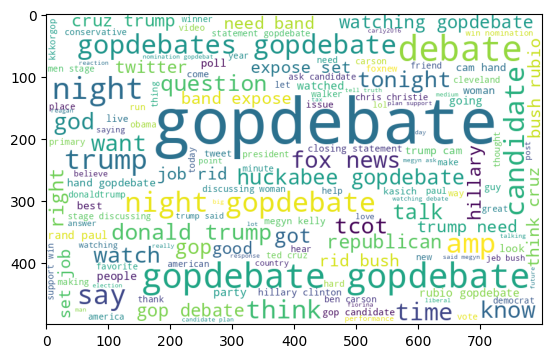

In [53]:
#visualize neutral word
neutral_wc= wc.generate(training_data[training_data["Target"]=='Neutral']['preprocess_text'].str.cat(sep=" "))
plt.imshow(neutral_wc)             #for display plot

In [54]:
#Now we extract top 30 positive words
positive_word=[]     #creating a blank list
for i in training_data[training_data["Target"]=='Positive']["preprocess_text"].tolist():   #coverting the preprocess text into list and using for loop to iterate each one
  for j in i.split():   #split each list into word and j iterate each word
    positive_word.append(j)        #append the word into blank list

In [55]:
#checking length of positive words
len(positive_word)

11622

In [56]:
#importing library to find most common 30 words
from collections import Counter
Counter(positive_word).most_common(40)

[('gopdebate', 999),
 ('gopdebates', 582),
 ('trump', 314),
 ('debate', 173),
 ('night', 126),
 ('rubio', 110),
 ('candidate', 109),
 ('fox', 107),
 ('amp', 103),
 ('cruz', 96),
 ('news', 96),
 ('need', 85),
 ('job', 83),
 ('question', 79),
 ('carson', 78),
 ('said', 76),
 ('thanks', 72),
 ('think', 71),
 ('rating', 68),
 ('tedcruz', 67),
 ('best', 67),
 ('like', 64),
 ('right', 64),
 ('great', 63),
 ('bush', 61),
 ('look', 60),
 ('president', 60),
 ('good', 57),
 ('ask', 55),
 ('know', 55),
 ('truth', 55),
 ('kasich', 50),
 ('set', 50),
 ('tell', 49),
 ('raising', 48),
 ('looking', 47),
 ('wallace', 46),
 ('rid', 46),
 ('gop', 46),
 ('band', 45)]

In [57]:
#creating a data frame
positive_word_dataframe= pd.DataFrame(Counter(positive_word).most_common(30))
positive_word_dataframe.rename(columns= {0:"word",1:"count"},inplace=True)
positive_word_dataframe.head(1)

,word,count
0,gopdebate,999


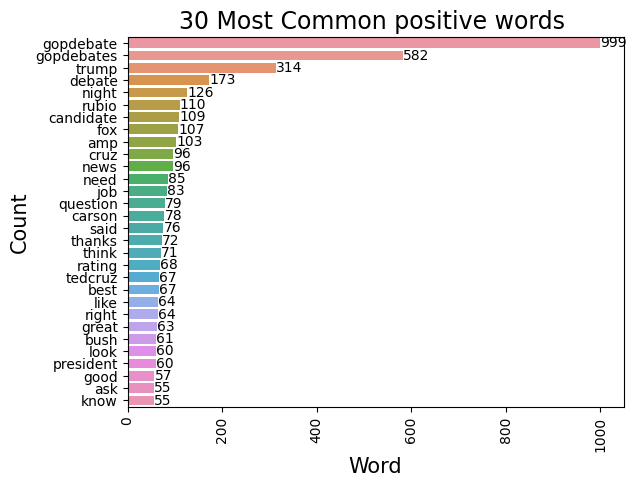

In [58]:
#let's visualize through bar plot
figsize=(15,20)
ax1= sns.barplot(data= positive_word_dataframe, y='word', x='count')
for label in ax1.containers:
    ax1.bar_label(label)
plt.xticks(rotation='vertical')
plt.title("30 Most Common positive words ", fontsize=17)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [59]:

#now we extraxt top 30 negative words
negative_word=[]     #creating a blank list
for i in training_data[training_data["Target"]=='Negative']["preprocess_text"].tolist():   #coverting the preprocess text into list and using for loop to iterate each one
  for j in i.split():   #split each list into word and j iterate each word
    negative_word.append(j)        #append the word into blank list

In [60]:
len(negative_word)

46961

In [61]:
#creating a data frame
negative_word_dataframe= pd.DataFrame(Counter(negative_word).most_common(30))
negative_word_dataframe.rename(columns= {0:"word",1:"count"},inplace=True)
negative_word_dataframe.head(1)

,word,count
0,gopdebate,3636


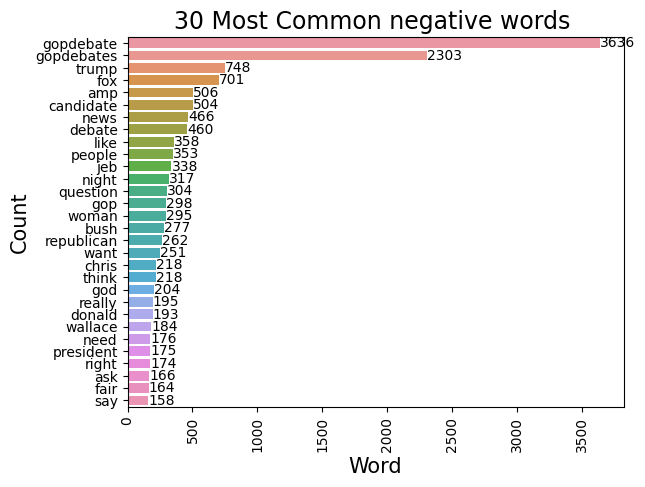

In [62]:
#let's visualize through bar plot
figsize=(15,20)
ax=sns.barplot(data= negative_word_dataframe, y='word', x='count')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation='vertical')
plt.title("30 Most Common negative words ", fontsize=17)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [63]:
#now we extraxt top 30 neutral words
neutral_word=[]     #creating a blank list
for i in training_data[training_data["Target"]=='Neutral']["preprocess_text"].tolist():   #coverting the preprocess text into list and using for loop to iterate each one
  for j in i.split():   #split each list into word and j iterate each word
    neutral_word.append(j)        #append the word into blank list

In [64]:
len(neutral_word)

14534

In [65]:
#creating a data frame
neutral_word_dataframe= pd.DataFrame(Counter(neutral_word).most_common(30))
neutral_word_dataframe.rename(columns= {0:"word",1:"count"},inplace=True)
neutral_word_dataframe.head(1)

,word,count
0,gopdebate,1397


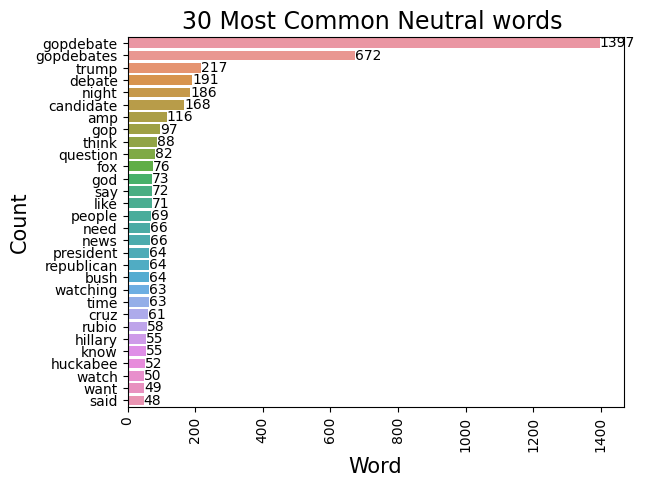

In [66]:
#let's visualize through bar plot
figsize=(15,20)
ax=sns.barplot(data= neutral_word_dataframe, y='word', x='count')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation='vertical')
plt.title("30 Most Common Neutral words ", fontsize=17)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

**Converting target column to numerical**

In [67]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()        #creating an object of LabelEncoder
training_data['Target']= le.fit_transform(training_data["Target"])
test_data['Target']= le.transform(test_data["Target"])

In [68]:
training_data.head()     #checing train after applying label encoding

,Target,preprocess_text
2514,1,real illegal alien gopdebate farrakhan immigra...
4385,2,rubio win gopdebate
10151,2,gopdebates kasich deserves airtime
7988,2,trump said megyn ask candidate plan support wi...
11997,0,fox news admit republican leader right mean le...


In [69]:
training_data["Target"].value_counts() #ckecking total number of values

0    5684
1    2112
2    1497
Name: Target, dtype: int64

In [70]:
test_data.head()     #checing test data after applying label encoding

,Target,preprocess_text
5040,2,real winner night gopdebate megynkelly
1078,2,result candidate gopdebate makeamericagreataga...
13717,2,going bed get vote tonight gopdebate gopdebates
3527,2,night gopdebate emerged
3404,1,told truth pant night gopdebate


In [71]:
test_data["Target"].value_counts()

0    2809
1    1030
2     739
Name: Target, dtype: int64

**Converting text column into vectorizer**

In [72]:
training_data.head(2)

,Target,preprocess_text
2514,1,real illegal alien gopdebate farrakhan immigra...
4385,2,rubio win gopdebate


In [73]:
#importing library
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_train_final= cv.fit_transform(training_data["preprocess_text"]).toarray()         #by default it will return a scipy sparse matrix so using toarray() function to convert matrix into numpyarray


In [74]:
X_train_final.shape

(9293, 8185)

In [75]:
y_train_final= training_data["Target"].values
y_train_final.shape

(9293,)

In [76]:
test_data.head()

,Target,preprocess_text
5040,2,real winner night gopdebate megynkelly
1078,2,result candidate gopdebate makeamericagreataga...
13717,2,going bed get vote tonight gopdebate gopdebates
3527,2,night gopdebate emerged
3404,1,told truth pant night gopdebate


In [77]:
test_data["preprocess_text"].shape

(4578,)

In [78]:
X_test_final= cv.transform(test_data["preprocess_text"]).toarray()         #by default it will return a scipy sparse matrix so using toarray() function to convert matrix into numpyarray

In [79]:
y_test_final= test_data["Target"].values
y_test_final.shape

(4578,)

In [80]:
X_test_final.shape

(4578, 8185)

**Model Building**

In [81]:
#importing all the algorithm that I am using
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [82]:
#creating an object
knc1 = KNeighborsClassifier()
mnb1 = MultinomialNB()
gnb1=GaussianNB()
dtc1 = DecisionTreeClassifier(max_depth=5)
lrc1 = LogisticRegression(solver='liblinear', penalty='l1')
rfc1 = RandomForestClassifier(n_estimators=50, random_state=2)

In [83]:
#creating an dictonary, keys hold the algorithm name and values hold an algorithm object
clfs = {
    'KN' : knc1,
    'MNB_NB': mnb1,
    'GNB_NB': gnb1,
    'DT': dtc1,
    'LR': lrc1,
    'RF': rfc1,

}

In [84]:
#creating an function, in which we predict values and find accuracy and precision score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    ytrain_pred1 = clf.predict(X_train)
    y_pred = clf.predict(X_test)


    accuracytrain = accuracy_score(y_train,ytrain_pred1)
    precisiontrain = precision_score(y_train,ytrain_pred1,average='micro')

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')

    return accuracy,precision,accuracytrain, precisiontrain

In [85]:
trainaccuracy_scores = []          #creating a blank list to add all the accuracy score
trainprecision_scores = []
accuracy_scores = []          #creating a blank list to add all the accuracy score
precision_scores = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy,current_precision, current_accuracy1,current_precision1 = train_classifier(clf, X_train_final,y_train_final,X_test_final,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("trainAccuracy - ",current_accuracy1)
    print("trainPrecision - ",current_precision1)

    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    trainaccuracy_scores.append(current_accuracy1)
    trainprecision_scores.append(current_precision1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  KN
trainAccuracy -  0.6758850747874744
trainPrecision -  0.6758850747874744
Accuracy -  0.5375709916994321
Precision -  0.5375709916994321

For  MNB_NB
trainAccuracy -  0.7896266006671688
trainPrecision -  0.7896266006671688
Accuracy -  0.6557448667540411
Precision -  0.6557448667540411

For  GNB_NB
trainAccuracy -  0.6524265576240181
trainPrecision -  0.6524265576240181
Accuracy -  0.4054172127566623
Precision -  0.4054172127566623

For  DT
trainAccuracy -  0.6320886688905628
trainPrecision -  0.6320886688905628
Accuracy -  0.626692878986457
Precision -  0.626692878986457

For  LR
trainAccuracy -  0.7700419670719897
trainPrecision -  0.7700419670719897
Accuracy -  0.6712538226299695
Precision -  0.6712538226299695

For  RF
trainAccuracy -  0.9365113526310126
trainPrecision -  0.9365113526310126
Accuracy -  0.6524683267802533
Precision -  0.6524683267802533


After using the countvectorizer except decision tree all models are overfit but accuracy of lr was more than others. So trying to improve lr model.

In [86]:
#logistic reg accuracy was more, so trying to improve it.

In [87]:
lr1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.1)
lr1.fit(X_train_final, y_train_final)

print(lr1.score(X_train_final, y_train_final))  # train score)
print(lr1.score(X_test_final, y_test_final))   # test score)

0.6482298504250511
0.6384884228920926


In [88]:
## leT'S Cross-Validate the Logistic Regression Model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [89]:
## crOSS VALIDATE THE LR1 model

lr1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(lr1, X_train_final, y_train_final, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.62399139 0.63797741 0.62990855 0.63885899 0.64800861]
63.57 0.82


In [106]:
#create a pipeline & cross validate
from sklearn.pipeline import make_pipeline, Pipeline

X = training_data['preprocess_text']
y = training_data['Target']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

63.6 0.82


In [101]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [102]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [103]:
len(CV_pipe['CV'].vocabulary_)

8185

In [104]:
CV_pipe['CV'].vocabulary_

{'real': 5793,
 'illegal': 3594,
 'alien': 272,
 'gopdebate': 3134,
 'farrakhan': 2675,
 'immigration': 3612,
 'amp': 327,
 'mexican': 4554,
 'bor': 890,
 'rubio': 6167,
 'win': 8020,
 'gopdebates': 3138,
 'kasich': 3978,
 'deserves': 1992,
 'airtime': 254,
 'trump': 7457,
 'said': 6213,
 'megyn': 4508,
 'ask': 473,
 'candidate': 1085,
 'plan': 5307,
 'support': 7015,
 'nomination': 4870,
 'gopdebat': 3133,
 'fox': 2879,
 'news': 4831,
 'admit': 182,
 'republican': 5965,
 'leader': 4146,
 'right': 6076,
 'mean': 4478,
 'lead': 4144,
 'gopd': 3126,
 'night': 4846,
 'saw': 6270,
 'bunch': 1007,
 'rich': 6060,
 'old': 4983,
 'despot': 2001,
 'zero': 8170,
 'solution': 6699,
 'nation': 4765,
 'problem': 5552,
 'uniteblue': 7645,
 'cnn': 1399,
 'using': 7730,
 'troll': 7445,
 'liberal': 4204,
 'new': 4827,
 'favorite': 2698,
 'thing': 7244,
 'frankluntz': 2901,
 'lol': 4294,
 'sham': 6436,
 'focus': 2829,
 'group': 3220,
 'plant': 5316,
 'trump2016': 7458,
 'hand': 3281,
 'yes': 8143,
 'log

In [90]:
#using tfidf to improve model performance
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()

In [91]:
X_train_final1= tfidf.fit_transform(training_data["preprocess_text"]).toarray()

In [92]:
X_train_final1.shape

(9293, 8185)

In [93]:
X_test_final1= tfidf.transform(test_data["preprocess_text"]).toarray()

In [94]:
X_test_final1.shape

(4578, 8185)

In [95]:
trainaccuracy_scores = []          #creating a blank list to add all the accuracy score
trainprecision_scores = []
accuracy_scores = []          #creating a blank list to add all the accuracy score
precision_scores = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy,current_precision, current_accuracy1,current_precision1 = train_classifier(clf, X_train_final1,y_train_final,X_test_final1,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("trainAccuracy - ",current_accuracy1)
    print("trainPrecision - ",current_precision1)

    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    trainaccuracy_scores.append(current_accuracy1)
    trainprecision_scores.append(current_precision1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  KN
trainAccuracy -  0.7111804584095556
trainPrecision -  0.7111804584095556
Accuracy -  0.5878112712975099
Precision -  0.5878112712975099

For  MNB_NB
trainAccuracy -  0.7136554395781771
trainPrecision -  0.7136554395781771
Accuracy -  0.6500655307994757
Precision -  0.6500655307994757

For  GNB_NB
trainAccuracy -  0.6523189497471215
trainPrecision -  0.6523189497471215
Accuracy -  0.40345128877238967
Precision -  0.40345128877238967

For  DT
trainAccuracy -  0.6326267082750457
trainPrecision -  0.6326267082750457
Accuracy -  0.627129750982962
Precision -  0.627129750982962

For  LR
trainAccuracy -  0.7069837512105887
trainPrecision -  0.7069837512105887
Accuracy -  0.6714722586282219
Precision -  0.6714722586282219

For  RF
trainAccuracy -  0.9365113526310126
trainPrecision -  0.9365113526310126
Accuracy -  0.6686325906509393
Precision -  0.6686325906509393


After using tfidf vectorizer the accuracy of logistic regression was more

In [151]:
lr3 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
lr3.fit(X_train_final1, y_train_final)

print(lr3.score(X_train_final1, y_train_final))  # train score)
print(lr3.score(X_test_final1, y_test_final))   # test score)

0.6671688367588507
0.6557448667540411


In [118]:
## crOSS VALIDATE THE LR1 model

lr2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results1 = cross_val_score(lr2, X_train_final1, y_train_final, cv=kfold, scoring='accuracy')
print(results1)
print(np.round((results1.mean())*100, 2), np.round((results1.std())*100, 2))

[0.63851533 0.6492738  0.65411512 0.65392896 0.66146394]
65.15 0.76


In [132]:
#using tfidf to improve model performance
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1= TfidfVectorizer(max_features=3000)

In [133]:
X_train_final2= tfidf1.fit_transform(training_data["preprocess_text"]).toarray()
X_test_final2= tfidf1.transform(test_data["preprocess_text"]).toarray()

In [134]:
X_train_final2.shape, X_test_final2.shape

((9293, 3000), (4578, 3000))

In [135]:
trainaccuracy_scores1 = []          #creating a blank list to add all the accuracy score
trainprecision_scores1 = []
accuracy_scores1 = []          #creating a blank list to add all the accuracy score
precision_scores1 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy1,current_precision1, current_accuracy2,current_precision2 = train_classifier(clf, X_train_final2,y_train_final,X_test_final2,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("trainAccuracy - ",current_accuracy2)
    print("trainPrecision - ",current_precision2)

    print("Accuracy - ",current_accuracy1)
    print("Precision - ",current_precision1)

    trainaccuracy_scores1.append(current_accuracy1)
    trainprecision_scores1.append(current_precision1)
    accuracy_scores1.append(current_accuracy2)
    precision_scores1.append(current_precision2)


For  KN
trainAccuracy -  0.7181749704078338
trainPrecision -  0.7181749704078338
Accuracy -  0.5945827872433377
Precision -  0.5945827872433377

For  MNB_NB
trainAccuracy -  0.7205423436995588
trainPrecision -  0.7205423436995588
Accuracy -  0.654871122761031
Precision -  0.654871122761031

For  GNB_NB
trainAccuracy -  0.4884321532336167
trainPrecision -  0.4884321532336167
Accuracy -  0.34491044124071646
Precision -  0.34491044124071646

For  DT
trainAccuracy -  0.6325191003981492
trainPrecision -  0.6325191003981492
Accuracy -  0.6260375709916994
Precision -  0.6260375709916994

For  LR
trainAccuracy -  0.711072850532659
trainPrecision -  0.711072850532659
Accuracy -  0.6725644386194845
Precision -  0.6725644386194845

For  RF
trainAccuracy -  0.9333907242010115
trainPrecision -  0.9333907242010115
Accuracy -  0.6686325906509393
Precision -  0.6686325906509393


Checking maximum feature 1000 to 4000 but in 3000 logistic reg give more accuracy that's why chossing max feature 3000

In [144]:
#trying to improve accuracy
lr4 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
lr4.fit(X_train_final2, y_train_final)

print(lr4.score(X_train_final2, y_train_final))  # train score)
print(lr4.score(X_test_final2, y_test_final))   # test score)

0.6786828795867857
0.6555264307557885


In [148]:
## crOSS VALIDATE THE LR1 model

lr5 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results1 = cross_val_score(lr4, X_train_final2, y_train_final, cv=kfold, scoring='accuracy')
print(results1)
print(np.round((results1.mean())*100, 2), np.round((results1.std())*100, 2))

[0.63152232 0.6422808  0.65357719 0.65769645 0.66092573]
64.92 1.09


In [149]:
#After comparing all models, I choose tfidf vectorizer and logistic reg

**Final Model Logistic Regression**

In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
lr5 =LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
lr5.fit(X_train_final1, y_train_final)
prediction2 = lr5.predict(X_test_final1)


print('Accuracy on Training Set: ', lr5.score(X_train_final1, y_train_final))
print('Accuracy on Testing Set: ', lr5.score(X_test_final1, y_test_final))

print("\n\t\t\tClassification report\n" , classification_report(y_test_final, prediction2))

Accuracy on Training Set:  0.6671688367588507
Accuracy on Testing Set:  0.6557448667540411

			Classification report
               precision    recall  f1-score   support

           0       0.70      0.87      0.78      2809
           1       0.51      0.21      0.30      1030
           2       0.51      0.46      0.48       739

    accuracy                           0.66      4578
   macro avg       0.57      0.51      0.52      4578
weighted avg       0.63      0.66      0.62      4578



**Test the Model**

In [200]:
x_test.head(20)

5040     To me, the real winner of last night #GOPDebat...
1078     RT @DanScavino: .@megynkelly,\nSome results on...
13717    I'm going to bed...@JohnKasich gets my vote to...
3527     @FoxNews  after last night's #GOPDebate  @Real...
3404     RT @TCPalmKGardner: Who told the truth and who...
360      I won't defend @FoxNews, they were FAR from fa...
977      RT @CCalbos: Huckabee: "the military is to kil...
1650     RT @ryanbeckwith: TRANSCRIPT: Here is the full...
8862     loved watching the #GOPdebates tonight. Lot of...
6182     RT @KaivanShroff: Wow. Beyond delusional...lik...
6648     In the aftermath of the #GOPDebate I’m incline...
9870     RT @ShawnDrurySC: Jeb: My father was...OH NEVE...
3467     Wondering how the day after the #GOPDebate is ...
3204     RT @kristenjobarton: me @ #GOPDebate talking a...
13188    RT @loribuckmajor: It's cute how Chris Christi...
7810     'RealAlexJones will be taking twitter question...
6697     Fox News was second rate last night. "Fair and.

In [156]:
pro=list(le.classes_)                #extract classes
pro

['Negative', 'Neutral', 'Positive']

In [170]:
#creating a function for twitter sentiment analysis
def twitter_analysis(sentence):
    li=[]                #creating a empty list
    sentiment = list(le.classes_)           #extract analysis
    clean_sentence= text_preprocess(sentence)      #call the textpreprocess function for cleaning the text and store into the new variable
    li.append(clean_sentence)          #append the cleaning data into empty list
    s = tfidf.transform(li)       #convert it into vector
    s = s.toarray()                #convert it into numpy array
    num = lr5.predict(s)[0]
                                          #use model for prediction
    return sentiment[num]                 #  return profile name

In [171]:
p='''RT @DillonFox5: No surprise here. \nTrump: "I don\'t have time for political correctness" \n #fox5atl #GOPDebate'''
twitter_analysis(p)

'Negative'

In [173]:
q='''RT @lybr3: Stupid cons saying #Trump #GOPDebate comments fuel #WarOnWomen rhetoric. Yeah, b/c libs needed a reason 2 use that baseless accu'''
twitter_analysis(q)      #checking test data 5589

'Negative'

In [222]:
x_test[5589], y_test[5589]     #checking with data

('RT @lybr3: Stupid cons saying #Trump #GOPDebate comments fuel #WarOnWomen rhetoric. Yeah, b/c libs needed a reason 2 use that baseless accu…',
 'Negative')

In [183]:
r= '''To me, the real winner of last night #GOPDebate was @megynkelly. #MegynKelly'''
twitter_analysis(r)

'Positive'

In [223]:
#checking with data
x_test[5040], y_test[5040]

('To me, the real winner of last night #GOPDebate was @megynkelly. #MegynKelly',
 'Positive')

In [187]:
s='''RT @DanScavino: .@megynkelly,\nSome results on how candidates did at #GOPDebate. #MakeAmericaGreatAgain #Trump2016 #KellyFailed http://t.co/…'''
twitter_analysis(s)

'Positive'

In [227]:
x_test[1078], y_test[1078] #checking with data

('RT @DanScavino: .@megynkelly,\nSome results on how candidates did at #GOPDebate. #MakeAmericaGreatAgain #Trump2016 #KellyFailed http://t.co/…',
 'Positive')

In [208]:
t='''RealAlexJones will be taking twitter questions on #GOPdebate in 3rd hr of today's show. Watch live 11am-2pm ct: http://t.co/U2PTc9Yx3k v…'''
twitter_analysis(t)

'Neutral'

In [228]:
x_test[7810], y_test[7810]         #checking with data

("'RealAlexJones will be taking twitter questions on #GOPdebate in 3rd hr of today's show. Watch live 11am-2pm ct: http://t.co/U2PTc9Yx3k v…",
 'Neutral')

**Saving the Model**

In [215]:
import pickle
pickle.dump(twitter_analysis, open("sentiment_analysis", "wb"))

In [216]:
model= pickle.load(open("sentiment_analysis","rb"))

In [219]:
#testing pickle model
jk= '''RT @ShawnDrurySC: Jeb: My father was...OH NEVERMIND. Parenting is so overrated. #GOPDebates #BNRDebates'''
model(jk)

'Negative'

In [221]:
#checking with data
x_test[9870], y_test[9870]


('RT @ShawnDrurySC: Jeb: My father was...OH NEVERMIND. Parenting is so overrated. #GOPDebates #BNRDebates',
 'Negative')